In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#Modelling
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# Scaling and categorical conversion
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report


adult_df = 'adult.csv'

adult_df = pd.read_csv(adult_df, sep=',', decimal='.', header=None, index_col=False,\
    names=['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'classes'])

target = 'classes'

adult_df = adult_df.applymap(lambda val: val.strip() if type(val) == str else val)
adult_df = adult_df.applymap(lambda val: val.lower() if type(val) == str else val)

In [2]:
# adult_df.loc[adult_df.capital_gain == 0, 'capital_gain'] = np.nan

# adult_df['capital_gain'] = adult_df['capital_gain'].fillna(-1)

# adult_df.loc[adult_df.capital_loss == 0, 'capital_loss'] = np.nan
# adult_df['capital_loss'] = adult_df['capital_loss'].fillna(-1)

In [3]:
adult_df[target].value_counts()

<=50k    24720
>50k      7841
Name: classes, dtype: int64

In [4]:
adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,classes
0,39,state-gov,77516,bachelors,13,never-married,adm-clerical,not-in-family,white,male,2174,0,40,united-states,<=50k
1,50,self-emp-not-inc,83311,bachelors,13,married-civ-spouse,exec-managerial,husband,white,male,0,0,13,united-states,<=50k
2,38,private,215646,hs-grad,9,divorced,handlers-cleaners,not-in-family,white,male,0,0,40,united-states,<=50k
3,53,private,234721,11th,7,married-civ-spouse,handlers-cleaners,husband,black,male,0,0,40,united-states,<=50k
4,28,private,338409,bachelors,13,married-civ-spouse,prof-specialty,wife,black,female,0,0,40,cuba,<=50k


In [5]:
adult_df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  classes         32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
adult_df['workclass'].value_counts()

private             22696
self-emp-not-inc     2541
local-gov            2093
?                    1836
state-gov            1298
self-emp-inc         1116
federal-gov           960
without-pay            14
never-worked            7
Name: workclass, dtype: int64

In [8]:
adult_df['occupation'].value_counts()

prof-specialty       4140
craft-repair         4099
exec-managerial      4066
adm-clerical         3770
sales                3650
other-service        3295
machine-op-inspct    2002
?                    1843
transport-moving     1597
handlers-cleaners    1370
farming-fishing       994
tech-support          928
protective-serv       649
priv-house-serv       149
armed-forces            9
Name: occupation, dtype: int64

In [9]:
adult_df['native_country'].value_counts()

united-states                 29170
mexico                          643
?                               583
philippines                     198
germany                         137
canada                          121
puerto-rico                     114
el-salvador                     106
india                           100
cuba                             95
england                          90
jamaica                          81
south                            80
china                            75
italy                            73
dominican-republic               70
vietnam                          67
guatemala                        64
japan                            62
poland                           60
columbia                         59
taiwan                           51
haiti                            44
iran                             43
portugal                         37
nicaragua                        34
peru                             31
greece                      

In [10]:
adult_df['education'].value_counts()

hs-grad         10501
some-college     7291
bachelors        5355
masters          1723
assoc-voc        1382
11th             1175
assoc-acdm       1067
10th              933
7th-8th           646
prof-school       576
9th               514
12th              433
doctorate         413
5th-6th           333
1st-4th           168
preschool          51
Name: education, dtype: int64

In [11]:
adult_df['education_num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64

In [12]:
adult_df = adult_df.drop(columns='education')

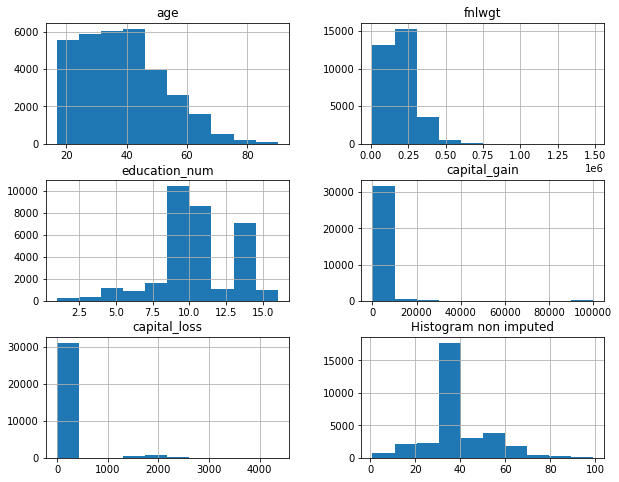

In [13]:
adult_df.hist(figsize=(10,8))
plt.title('Histogram non imputed')
plt.show()

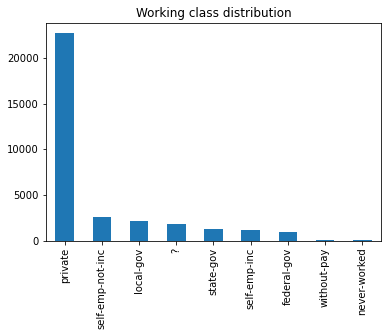

In [14]:
adult_df['workclass']\
    .value_counts()\
        .plot(kind='bar', x='workclass', y='Val', rot=90)
plt.title('Working class distribution')
plt.show()

<AxesSubplot:ylabel='marital_status'>

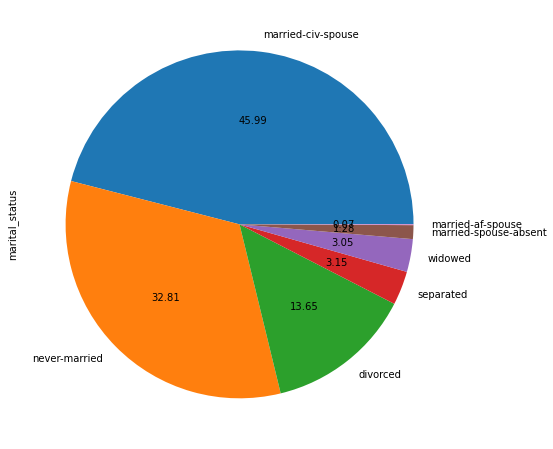

In [15]:
adult_df['marital_status']\
    .value_counts()\
        .plot(kind='pie', figsize=(8,8), autopct='%.2f')

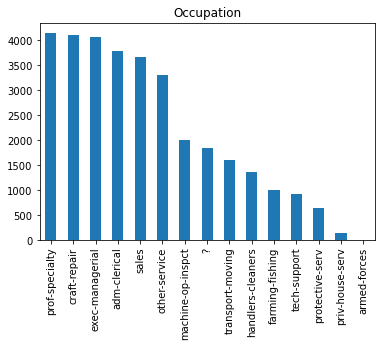

In [16]:
adult_df['occupation']\
    .value_counts()\
        .plot(kind='bar', x='occupation', y='Val', rot=90)
plt.title('Occupation')
plt.show()

<AxesSubplot:ylabel='race'>

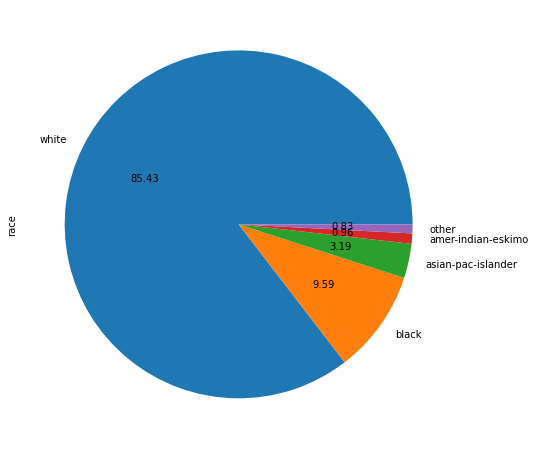

In [17]:
adult_df['race']\
    .value_counts()\
        .plot(kind='pie', x='race', figsize=(8,8), autopct='%.2f')

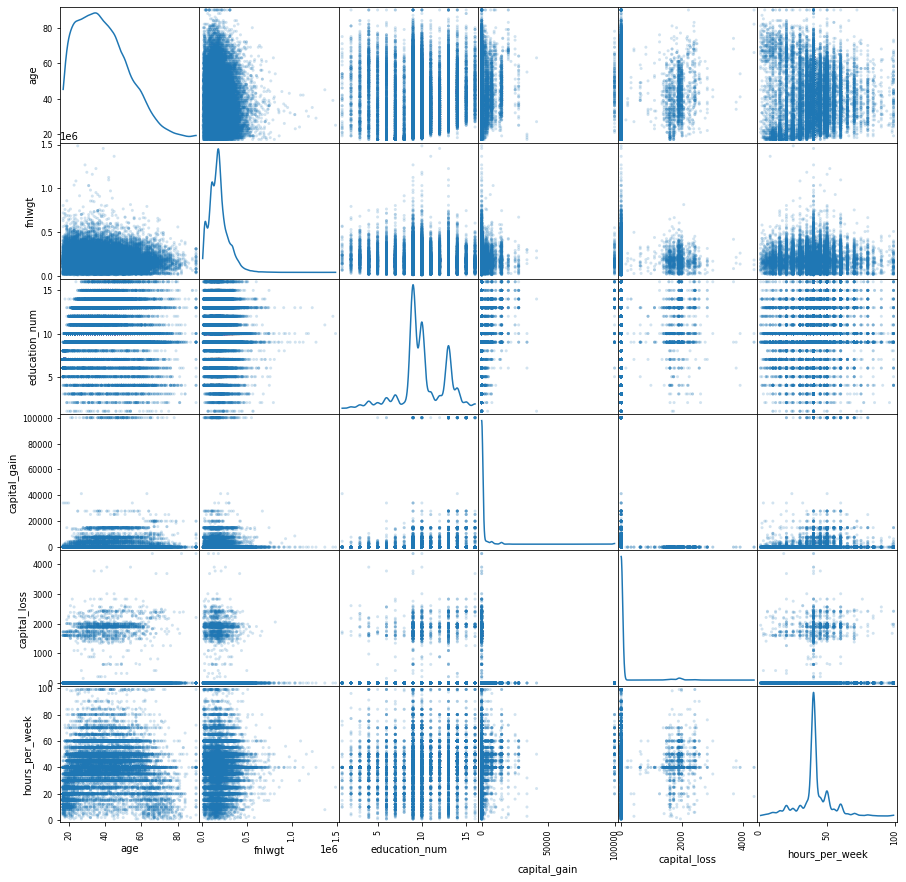

In [18]:
df_matrix = adult_df.columns.drop(['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'classes'])


pd.plotting.scatter_matrix(adult_df[df_matrix], alpha=0.2, figsize=(15,15), diagonal='kde')
plt.show()

Hypothesis #2: Relationship between Age/hours worked per week and the target classes

<AxesSubplot:xlabel='age', ylabel='hours_per_week'>

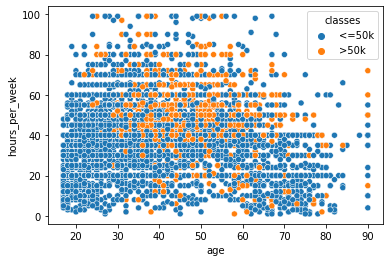

In [19]:
sns.scatterplot(
    x="age", y="hours_per_week", data=adult_df[:15000],
    hue='classes'
)

Training and testing proccess: KNearestNeighbour 

In [20]:
target_column = 'classes'
target = adult_df[target_column]

data = adult_df.iloc[:,:-1]


In [21]:
#preprocessing setup
categorical_columns_selector = selector(dtype_include=object)
numerical_columns_selector = selector(dtype_exclude=object)

categorical_columns = categorical_columns_selector(data)
numerical_columns = numerical_columns_selector(data)

categorical_preprocessing = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessing = StandardScaler()

preprocessing = ColumnTransformer([
    ('one_hot_encoder', categorical_preprocessing, categorical_columns),
    ('standard_scaler', numerical_preprocessing, numerical_columns)
])



In [22]:

model = make_pipeline(preprocessing, KNeighborsClassifier(10, weights='distance', algorithm='brute'))

data_train, data_test, target_train, target_test = train_test_split(data,
                                                    target,
                                                    test_size=0.20,
                                                    random_state=8)

fit = model.fit(data_train, target_train)
predicted = fit.predict(data_test)

print(confusion_matrix(target_test, predicted))
print(classification_report(target_test, predicted))

[[4588  381]
 [ 625  919]]
              precision    recall  f1-score   support

       <=50k       0.88      0.92      0.90      4969
        >50k       0.71      0.60      0.65      1544

    accuracy                           0.85      6513
   macro avg       0.79      0.76      0.77      6513
weighted avg       0.84      0.85      0.84      6513



Testing and Training Process: Decision Tree

In [23]:
model = make_pipeline(preprocessing, DecisionTreeClassifier(criterion='entropy', max_depth=10000, min_samples_split=100, min_samples_leaf=20, max_leaf_nodes=100))

data_train, data_test, target_train, target_test = train_test_split(data,
                                                    target,
                                                    test_size=0.50,
                                                    random_state=10)

fit = model.fit(data_train, target_train)

predicted = fit.predict(data_test)

cm =confusion_matrix(target_test, predicted)
print(cm)
print(classification_report(target_test, predicted))

[[11269  1078]
 [ 1401  2533]]
              precision    recall  f1-score   support

       <=50k       0.89      0.91      0.90     12347
        >50k       0.70      0.64      0.67      3934

    accuracy                           0.85     16281
   macro avg       0.80      0.78      0.79     16281
weighted avg       0.84      0.85      0.85     16281

